# DIABETES DETECTION 

### Data understanding

<strong>About The Dataset</strong>

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.



<strong>Sources:</strong>

(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990

Dataset retrieved from
<a href="https://www.kaggle.com/mathchi/diabetes-data-set"> Kaggle Website</a>



### Datset Features

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [25]:
#importing basic data manipulation libraries
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
#ignore warnings
warnings.filterwarnings("ignore")


In [26]:
#loading the dataset
data=pd.read_csv('diabetes.csv')
#displaying the first five rows of the dataset
data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [27]:
# viewing columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
#identifying unique values in each column
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [29]:
#checking for missing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observation: The dataset has no missing value.

In [30]:
# checking for duplicates
data.duplicated().any()

False

Observation: Data has no duplicates

In [31]:
# checking for data balance
data.Outcome.value_counts().plot(kind='bar')

<Axes: xlabel='Outcome'>

Observation: Class is imbalanced

### Data Visualization

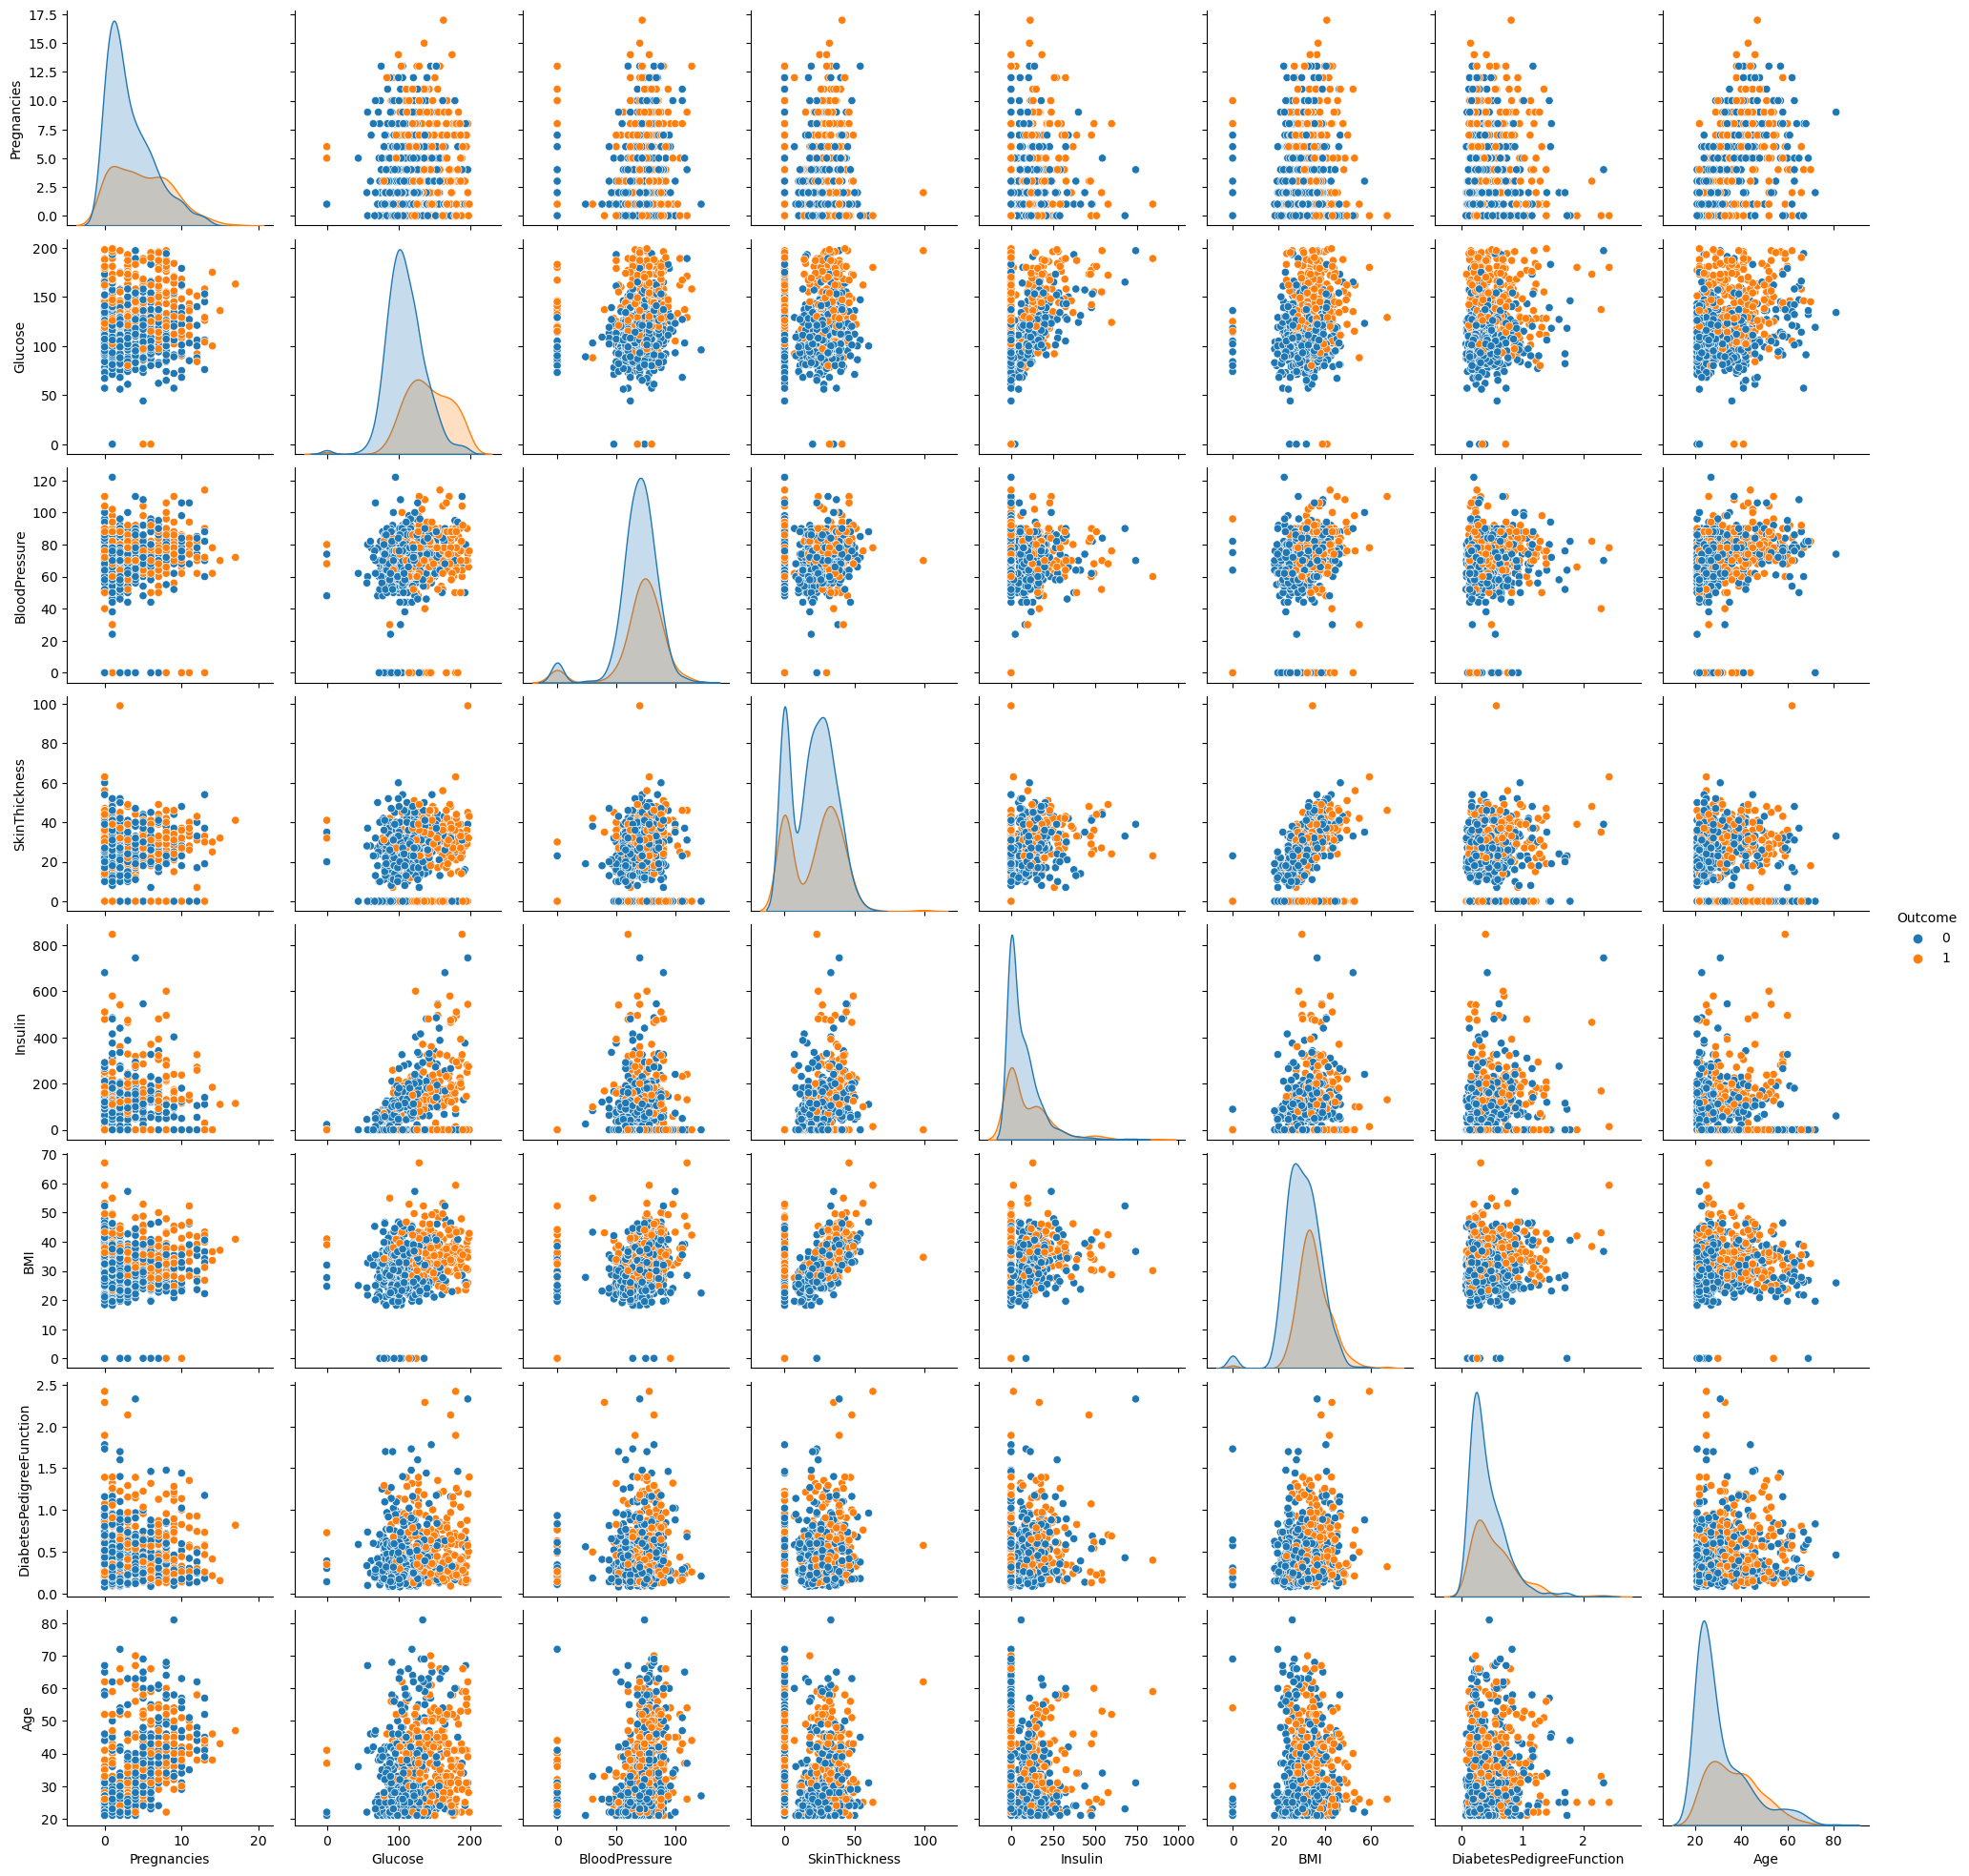

In [32]:
# visualizing the relationship between the target variablle and the features
sns.pairplot(data, hue="Outcome");

In [33]:
! conda install -c conda-forge nodejs

In [ ]:
# creating a dashboard of visualizations
import pywedge as pw
mc=pw.Pywedge_Charts(data,c=None, y="Outcome")
charts=mc.make_charts()


TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
fig=px.bar(data, x="BMI", y="Outcome", color='Insulin')
fig.show()

### Modelling

In [ ]:
#checking distribution of the outcomes in the dataset
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Importing packages

In [ ]:
# for dataset balancing
from imblearn.over_sampling import SMOTE
#pipeline constructor
from sklearn.pipeline import make_pipeline
#scaling
from sklearn.preprocessing import StandardScaler
#logistic regresiion
from sklearn.linear_model import LogisticRegression
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#decision tree
from sklearn.tree import DecisionTreeClassifier
#naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
#KNN
from sklearn.neighbors import KNeighborsClassifier
#support vector machine
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score


Dataset splitting

In [ ]:
#spliting dataset to train and test samples
from sklearn.model_selection import train_test_split
X=data.drop(columns=(['Outcome']))
y=data['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)



Logistic Regression

In [ ]:

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train,y_train)

pred=pipe.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
log_score=accuracy_score(pred,y_test)
print(log_score)

0.7445887445887446


In [ ]:
# implementing different models

#---------------------------implementing random forest-------------------------------
random_f =make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=1000))
#Training
random_f.fit(X_train, y_train)
#predicting using random forest
random_f_pred = random_f.predict(X_test)

#---------------------implementing decision tree--------------------------------
decision_t =make_pipeline(StandardScaler(),DecisionTreeClassifier())
# training using decision tree
decision_t.fit(X_train, y_train)
#predicting using decision tree
decision_t_pred=decision_t.predict(X_test)

#---------------------implementing Naive Bayes Algorithm------------------------
naive_b =make_pipeline(StandardScaler(),GaussianNB(priors=None))
# training using naive bayes
naive_b.fit(X_train, y_train)
# predicting using naive bayes algorithm
naive_b_pred=naive_b.predict(X_test)

#--------------------------------implementing knn algorithm-------------------------
knn =make_pipeline(StandardScaler(),KNeighborsClassifier())
#training
knn.fit(X_train,y_train)
#predicting
knn_pred=knn.predict(X_test)

#-------------------------------implementing support vector machine-----------------------
support_vm=make_pipeline(StandardScaler(),SVC())
#training
support_vm.fit(X_train,y_train)
#predicting
support_vm_pred=support_vm.predict(X_test)


In [ ]:
#Acurracies
random_f_score=accuracy_score(random_f_pred,y_test)
decision_t_score=accuracy_score(decision_t_pred,y_test)
knn_score=accuracy_score(knn_pred,y_test)
naive_b_score=accuracy_score(naive_b_pred,y_test)
support_vm_score=accuracy_score(support_vm_pred,y_test)


In [ ]:
models = {'Model':['Random Forest', 'Decision Tree', 'Naive Bayes','Support Vector Macine','KNN','Logistic Regression'],
        'Score':[random_f_score,decision_t_score, knn_score, naive_b_score,support_vm_score,log_score]}
models=df = pd.DataFrame(models)
models
 

Model     Score
0          Random Forest  0.748918
1          Decision Tree  0.701299
2            Naive Bayes  0.722944
3  Support Vector Macine  0.727273
4                    KNN  0.727273
5    Logistic Regression  0.744589

Visualizing our models

In [ ]:
fig = px.pie(models, values='Score', names='Model')
fig.show()

observation:Random Forest work the best with an accuracy of 74.46% 

### Deployment

saving our model for deployment

In [ ]:
# importing joblib
import joblib

In [ ]:
#serializing the model
joblib.dump(random_f, "model")

['model']

Model Testing

In [ ]:
#loading the model
mj=joblib.load("model")

In [ ]:
# Testing the whole X_test
mj.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
# extracting one record from X_test
t=X_test.iloc[1]

In [ ]:
#mj.predict(t)
type(t)

pandas.core.series.Series

In [ ]:
# transforming the pandas serries to a dataframe
t=pd.DataFrame(t)

In [ ]:
# the shape of the record
t.shape

(8, 1)

In [ ]:
#  transposing the dataframe
t.T

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
206          8.0    196.0           76.0           29.0    280.0  37.5   

     DiabetesPedigreeFunction   Age  
206                     0.605  57.0

In [ ]:
t.shape

(8, 1)

In [ ]:
# making the prediction
mj.predict(t.T)

array([1])

In [ ]:
# Implementing UX
try:
    if mj.predict(t.T)==1:
        print("You probably infected with Diabetes")
    elif mj.predict(t.T)==0:
        print("You are less likely to have been infected")
        
except NameError:
    print("The model run into an error!! ")
    

You probably infected with Diabetes


<p style="align-items:centre ; display: flex">
    ---------------THE END--------------

<p>Thanks for following &#128571;</p>

</p>